<a href="https://colab.research.google.com/github/Kiseki88/MachineLearning/blob/main/RainFallPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
df.shape

(142193, 24)

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [ ]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [ ]:
df.tail(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
142188       NaN           E           31.0        ESE  ...        27.0   
142189       NaN           E           31.0         SE  ...        24.0   
142190       NaN         NNW           22.0         SE  ...        21.0   
142191       NaN           N           37.0         SE  ...        24.0   
142192       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
142188       1024.7       1021.2       NaN       NaN      9.4     20.9   
142189       1024.6       1020.3       NaN       NaN     10.1     22.4   
142190       1023.5       1019.1       NaN       NaN     10.9     24.5   
142191       1021.0       1016.8       NaN       NaN     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RISK_MM  RainTomorrow  
142188        0.0      0.0             0  
142189        0.0      0.0             0  
142190        0.0      0.0             0  
142191        0.0      0.0             0  
142192        0.0      0.0             0  

[5 rows x 24 columns]

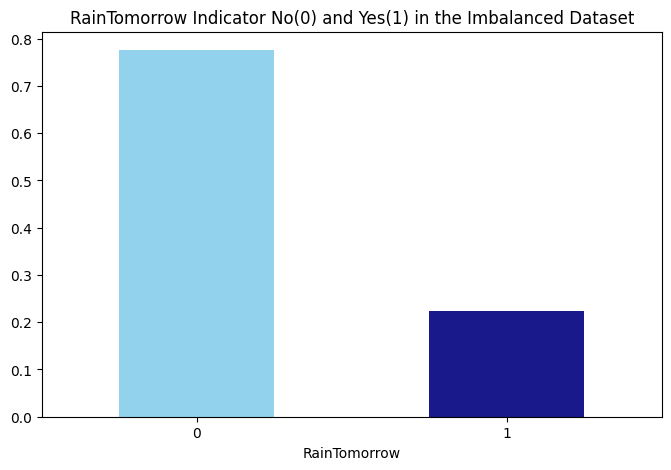

In [ ]:
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

**ONE WAY**

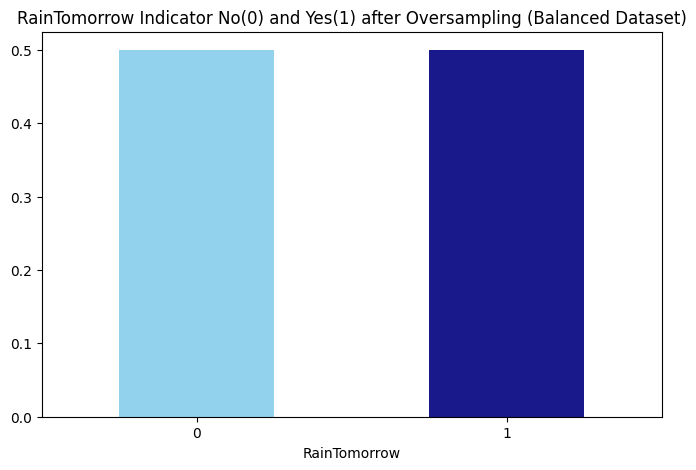

In [ ]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
df_oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
df_oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

In [ ]:
print(yes_oversampled)

              Date    Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
86699   2014-03-19      Cairns     24.2     31.1       0.0          5.8   
71464   2013-12-03        Nhil     12.6     33.3       0.0          NaN   
124022  2009-06-18     Walpole     12.3     18.4       9.2          NaN   
78684   2017-04-20    Watsonia     13.4     25.8       0.0          7.4   
125845  2015-02-21     Walpole     13.5     25.5       0.0          NaN   
...            ...         ...      ...      ...       ...          ...   
130416  2010-06-08  Launceston      1.1     11.8       0.4          NaN   
114384  2016-08-08  PearceRAAF      9.6     14.8      11.8          NaN   
84962   2009-03-18      Cairns     24.8     31.5       0.0          5.4   
54992   2012-08-17    Ballarat      4.2      7.9      11.4          NaN   
26599   2009-02-23    Richmond     19.5     31.6       0.2         10.4   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
86699        4.2        

**Another**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
def oversample_with_randomoversampler(df, target_col):
    # Separate features (X) and target (y)
    X = df.drop(columns=[target_col])  # Features (all columns except the target)
    y = df[target_col]  # Target (RainTomorrow column)

    # Initialize RandomOverSampler
    ros = RandomOverSampler(random_state=123)

    # Fit and resample the data to balance the target column
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # Create a new DataFrame with oversampled data
    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=target_col)], axis=1)

    # Plot the balanced class distribution
    df_resampled[target_col].value_counts(normalize=True).plot(kind='bar',
                                                               color=['skyblue', 'navy'],
                                                               alpha=0.9,
                                                               rot=0)
    plt.title(f'{target_col} Indicator After Random Oversampling (Balanced Dataset)')
    plt.show()

    return df_resampled

# Example usage


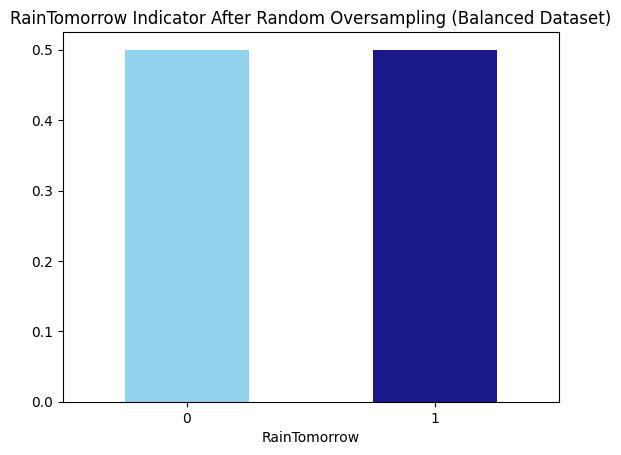

In [ ]:
df_resampled = oversample_with_randomoversampler(df, 'RainTomorrow')

Visualizing the Null Value Using HeatMap

<Axes: >

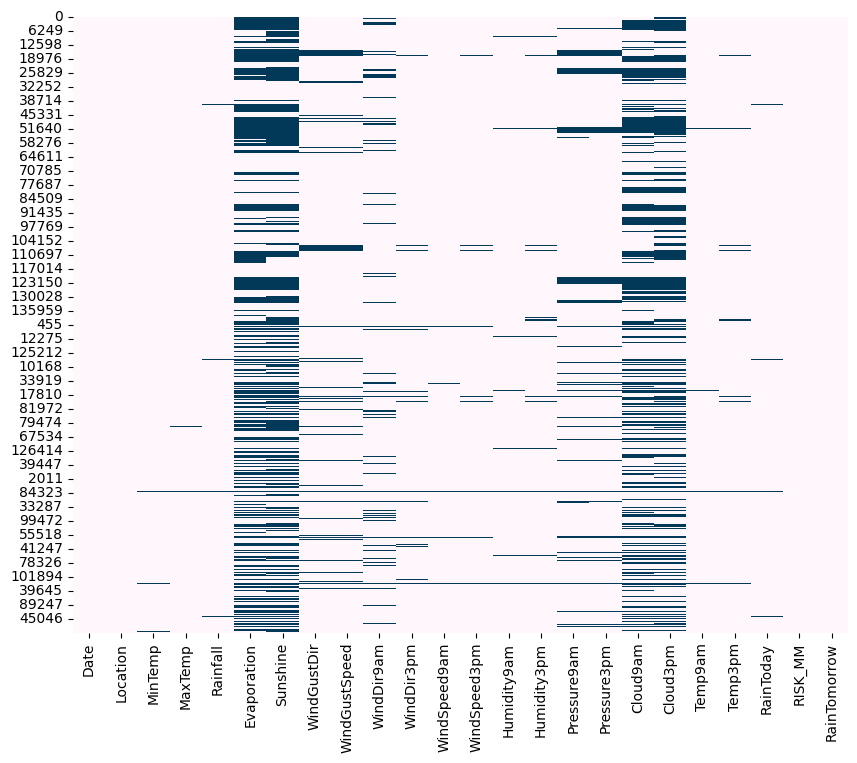

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(df_oversampled.isnull(), cbar=False, cmap='PuBu')

JUst another way if interested

<Axes: >

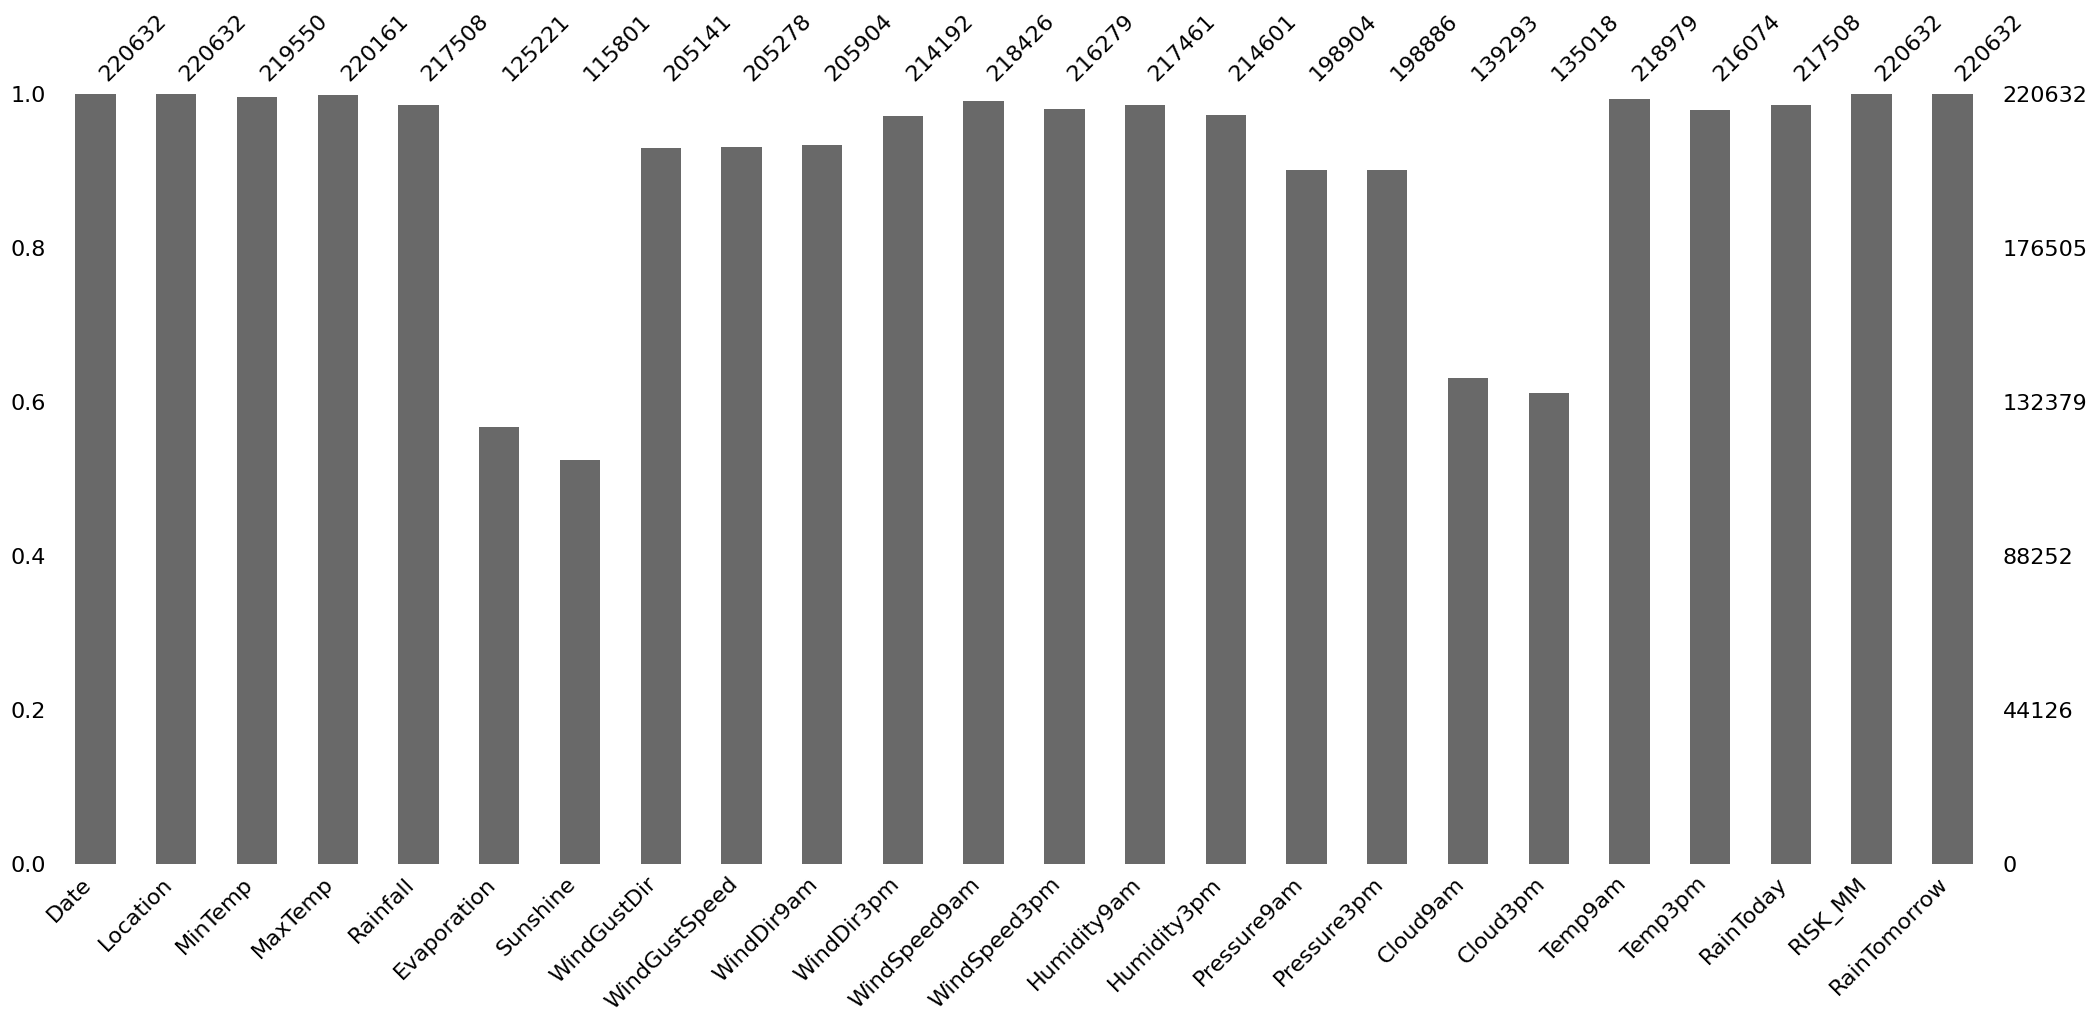

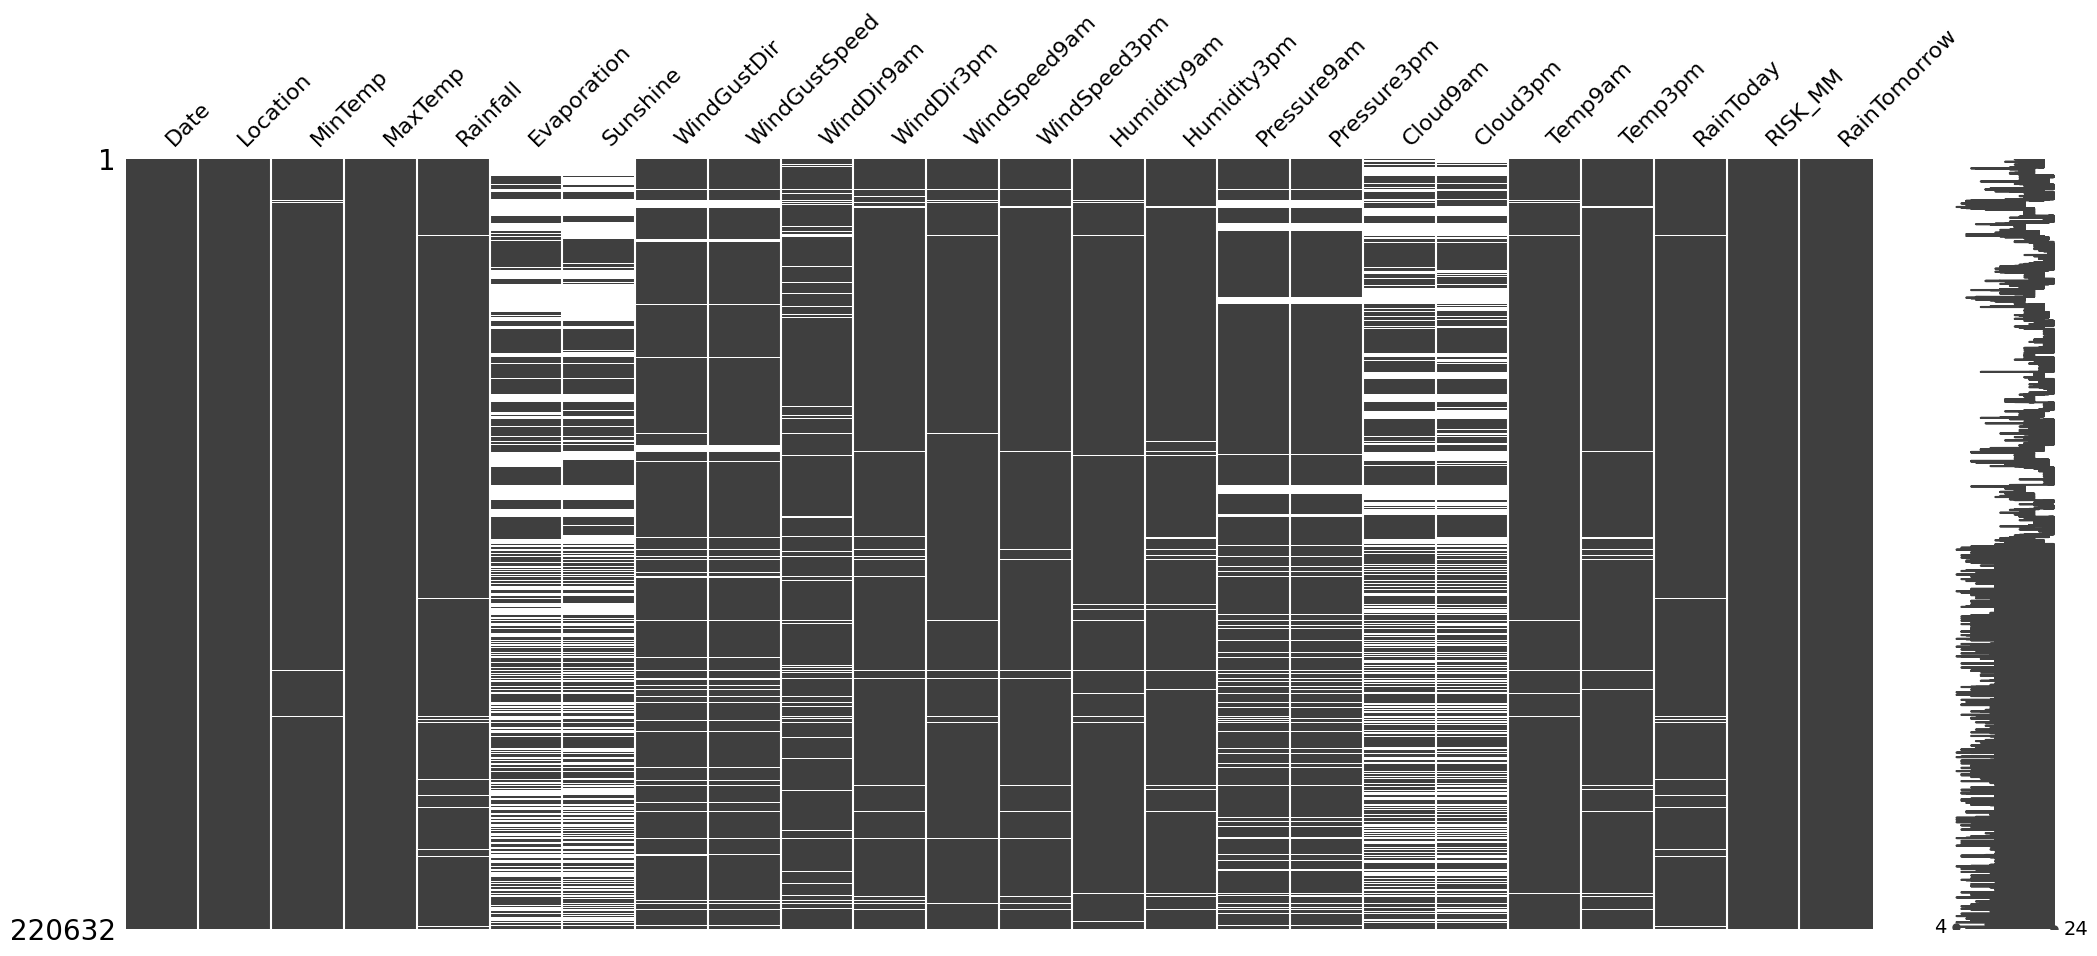

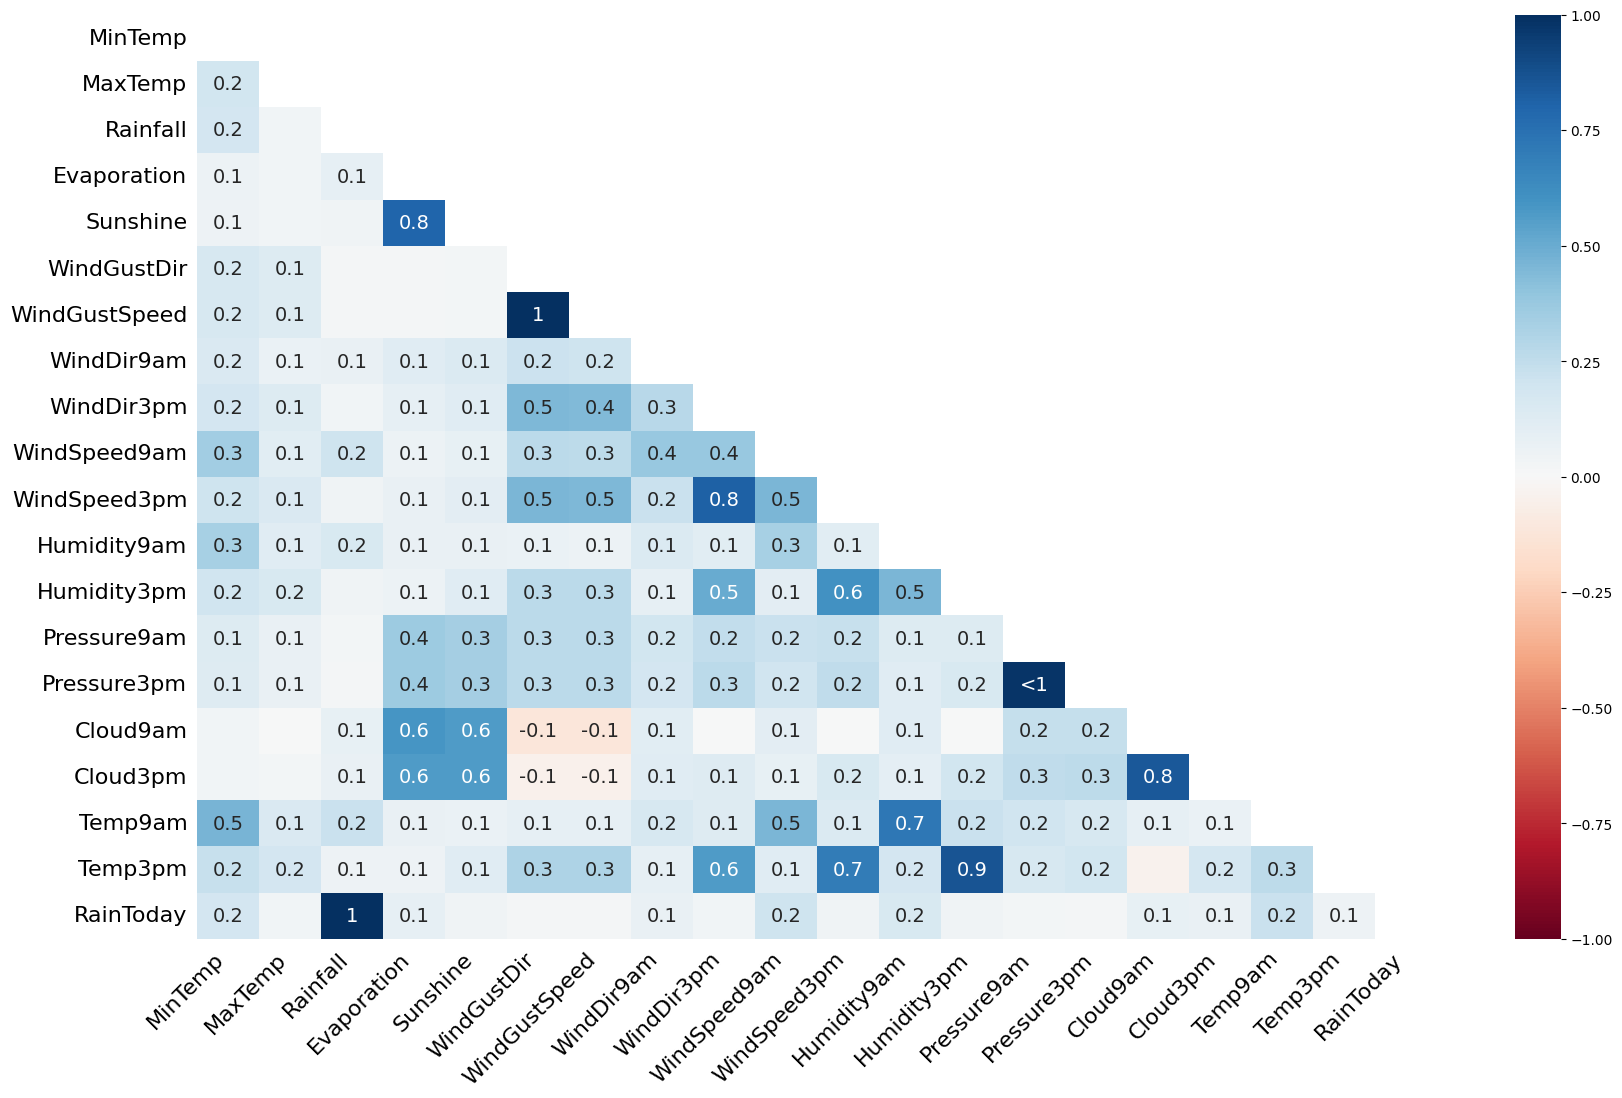

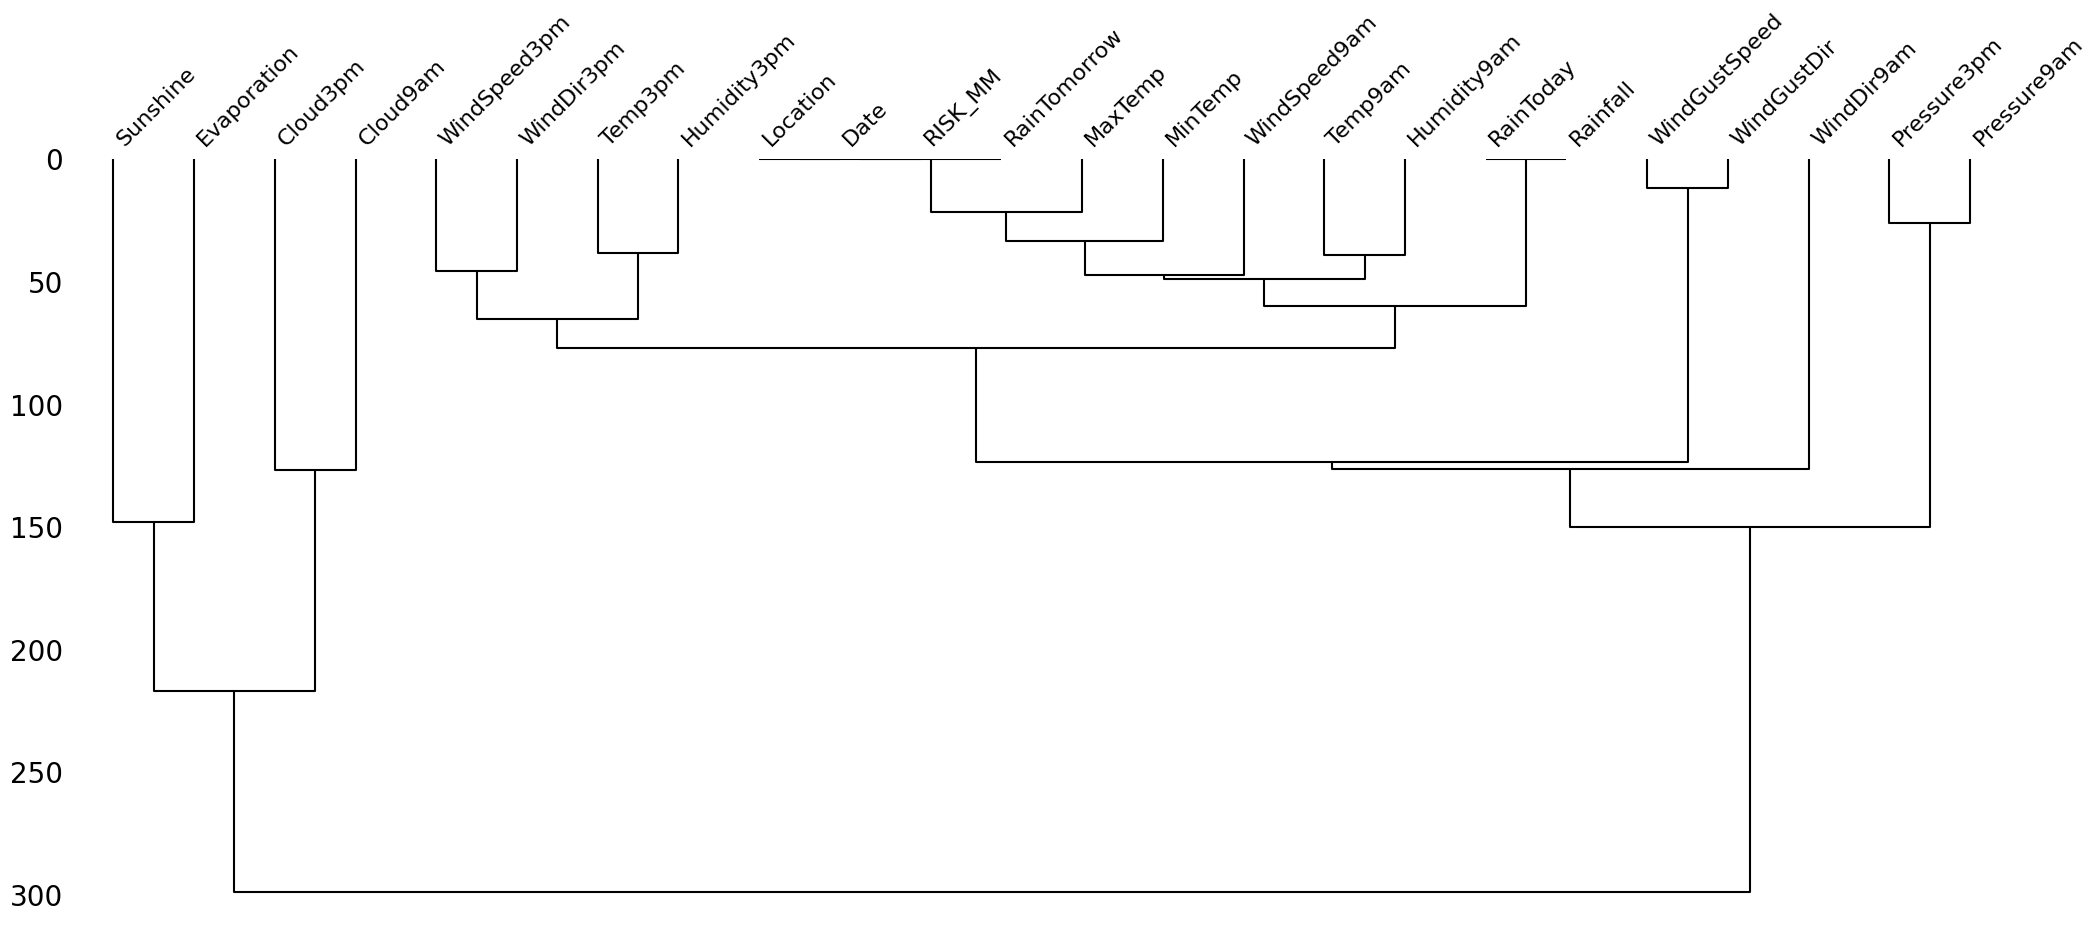

In [ ]:
import missingno as msno

# Visualize the missing data
msno.bar(df_oversampled)  # Bar plot showing the count of non-missing values per column
msno.matrix(df_oversampled)  # Matrix plot showing missing data patterns
msno.heatmap(df_oversampled)  # Correlation heatmap of missing values

# You can also create a dendrogram to show hierarchical clustering of missing values
msno.dendrogram(df_oversampled)

In [ ]:
na_variables = [var for var in df_oversampled.columns if df_oversampled[var].isnull().mean() > 0]
na_variables

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [ ]:
data_na = df_oversampled[na_variables].isnull().mean()
data_na.sort_values(ascending=False)

Sunshine         0.475140
Evaporation      0.432444
Cloud3pm         0.388040
Cloud9am         0.368664
Pressure3pm      0.098562
Pressure9am      0.098481
WindGustDir      0.070212
WindGustSpeed    0.069591
WindDir9am       0.066754
WindDir3pm       0.029189
Humidity3pm      0.027335
Temp3pm          0.020659
WindSpeed3pm     0.019730
Humidity9am      0.014372
RainToday        0.014159
Rainfall         0.014159
WindSpeed9am     0.009999
Temp9am          0.007492
MinTemp          0.004904
MaxTemp          0.002135
dtype: float64

In [ ]:
df_oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Select categorical columns
completedDf = df_oversampled.select_dtypes(include=['object']).columns

# Step 2: Fill missing values with the mode for each categorical column
for var in completedDf:
    df_oversampled[var] = df_oversampled[var].fillna(df_oversampled[var].mode()[0])

# Step 3: Apply Label Encoding to categorical columns
lencoders = {}
for col in completedDf:  # completedDf is just column names, but we use df_oversampled to access the data
    lencoders[col] = LabelEncoder()
    df_oversampled[col] = lencoders[col].fit_transform(df_oversampled[col])

# Now df_oversampled has label-encoded categorical columns

In [ ]:
completedDf.isnull().sum()

0

In [ ]:
completedDf = df_oversampled.copy(deep = True)

In [ ]:
completedDf.isnull().sum()

Date                  0
Location              0
MinTemp            1082
MaxTemp             471
Rainfall           3124
Evaporation       95411
Sunshine         104831
WindGustDir           0
WindGustSpeed     15354
WindDir9am            0
WindDir3pm            0
WindSpeed9am       2206
WindSpeed3pm       4353
Humidity9am        3171
Humidity3pm        6031
Pressure9am       21728
Pressure3pm       21746
Cloud9am          81339
Cloud3pm          85614
Temp9am            1653
Temp3pm            4558
RainToday          3124
RISK_MM               0
RainTomorrow          0
dtype: int64

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = completedDf.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(completedDf)

In [ ]:
MiceImputed.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [ ]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1

IQR

Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.119679
Sunshine            5.947404
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.681346
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64

In [ ]:
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(156852, 24)

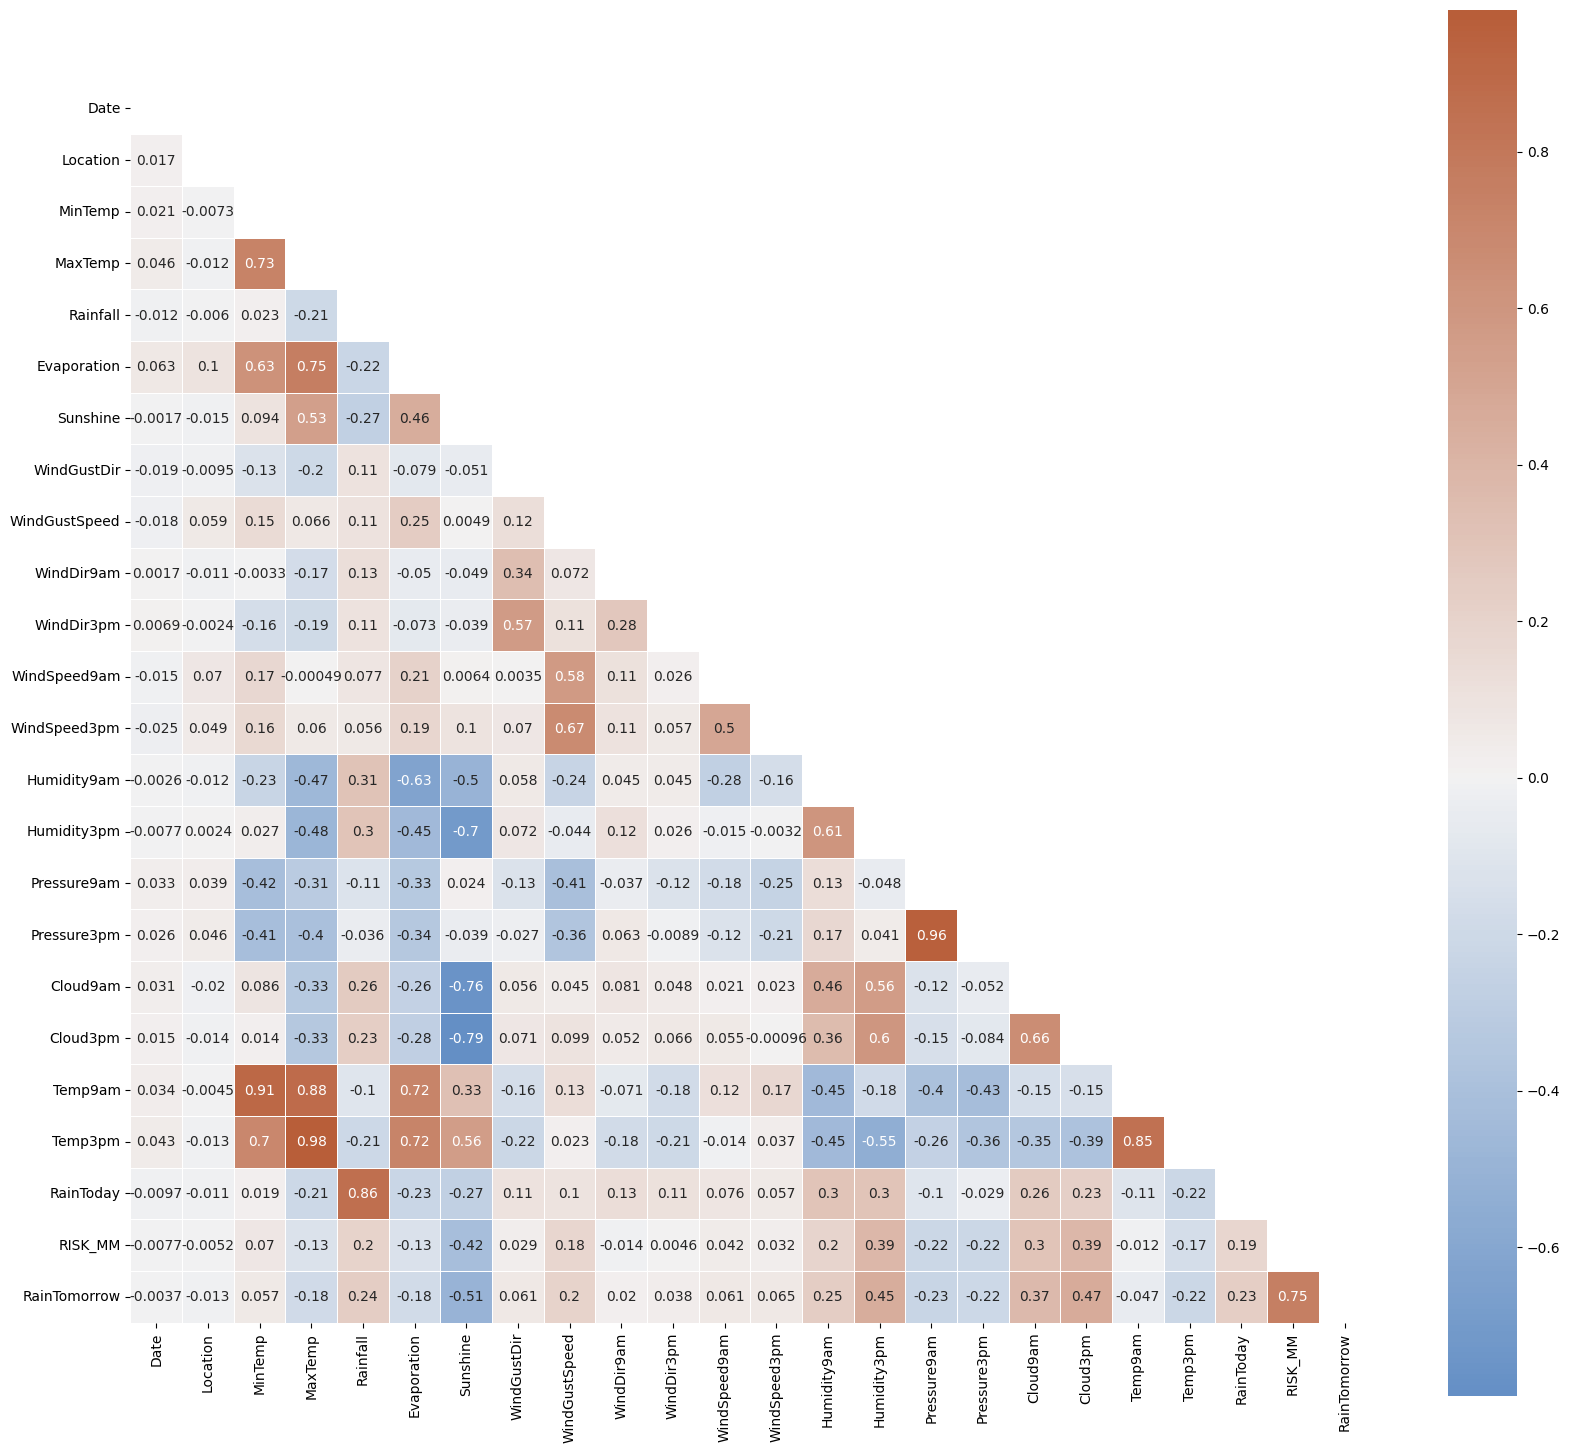

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming MiceImputed is your DataFrame
corr = MiceImputed.corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=np.bool_))  # Use np.bool_ instead of bool

# Set up the figure size
f, ax = plt.subplots(figsize=(20, 20))

# Set up the color palette for the heatmap
cmap = sns.diverging_palette(250, 25, as_cmap=True)

# Create the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True,
            annot=True, linewidths=.5, cbar_kws={"shrink": .9})

# Show the plot
plt.show()

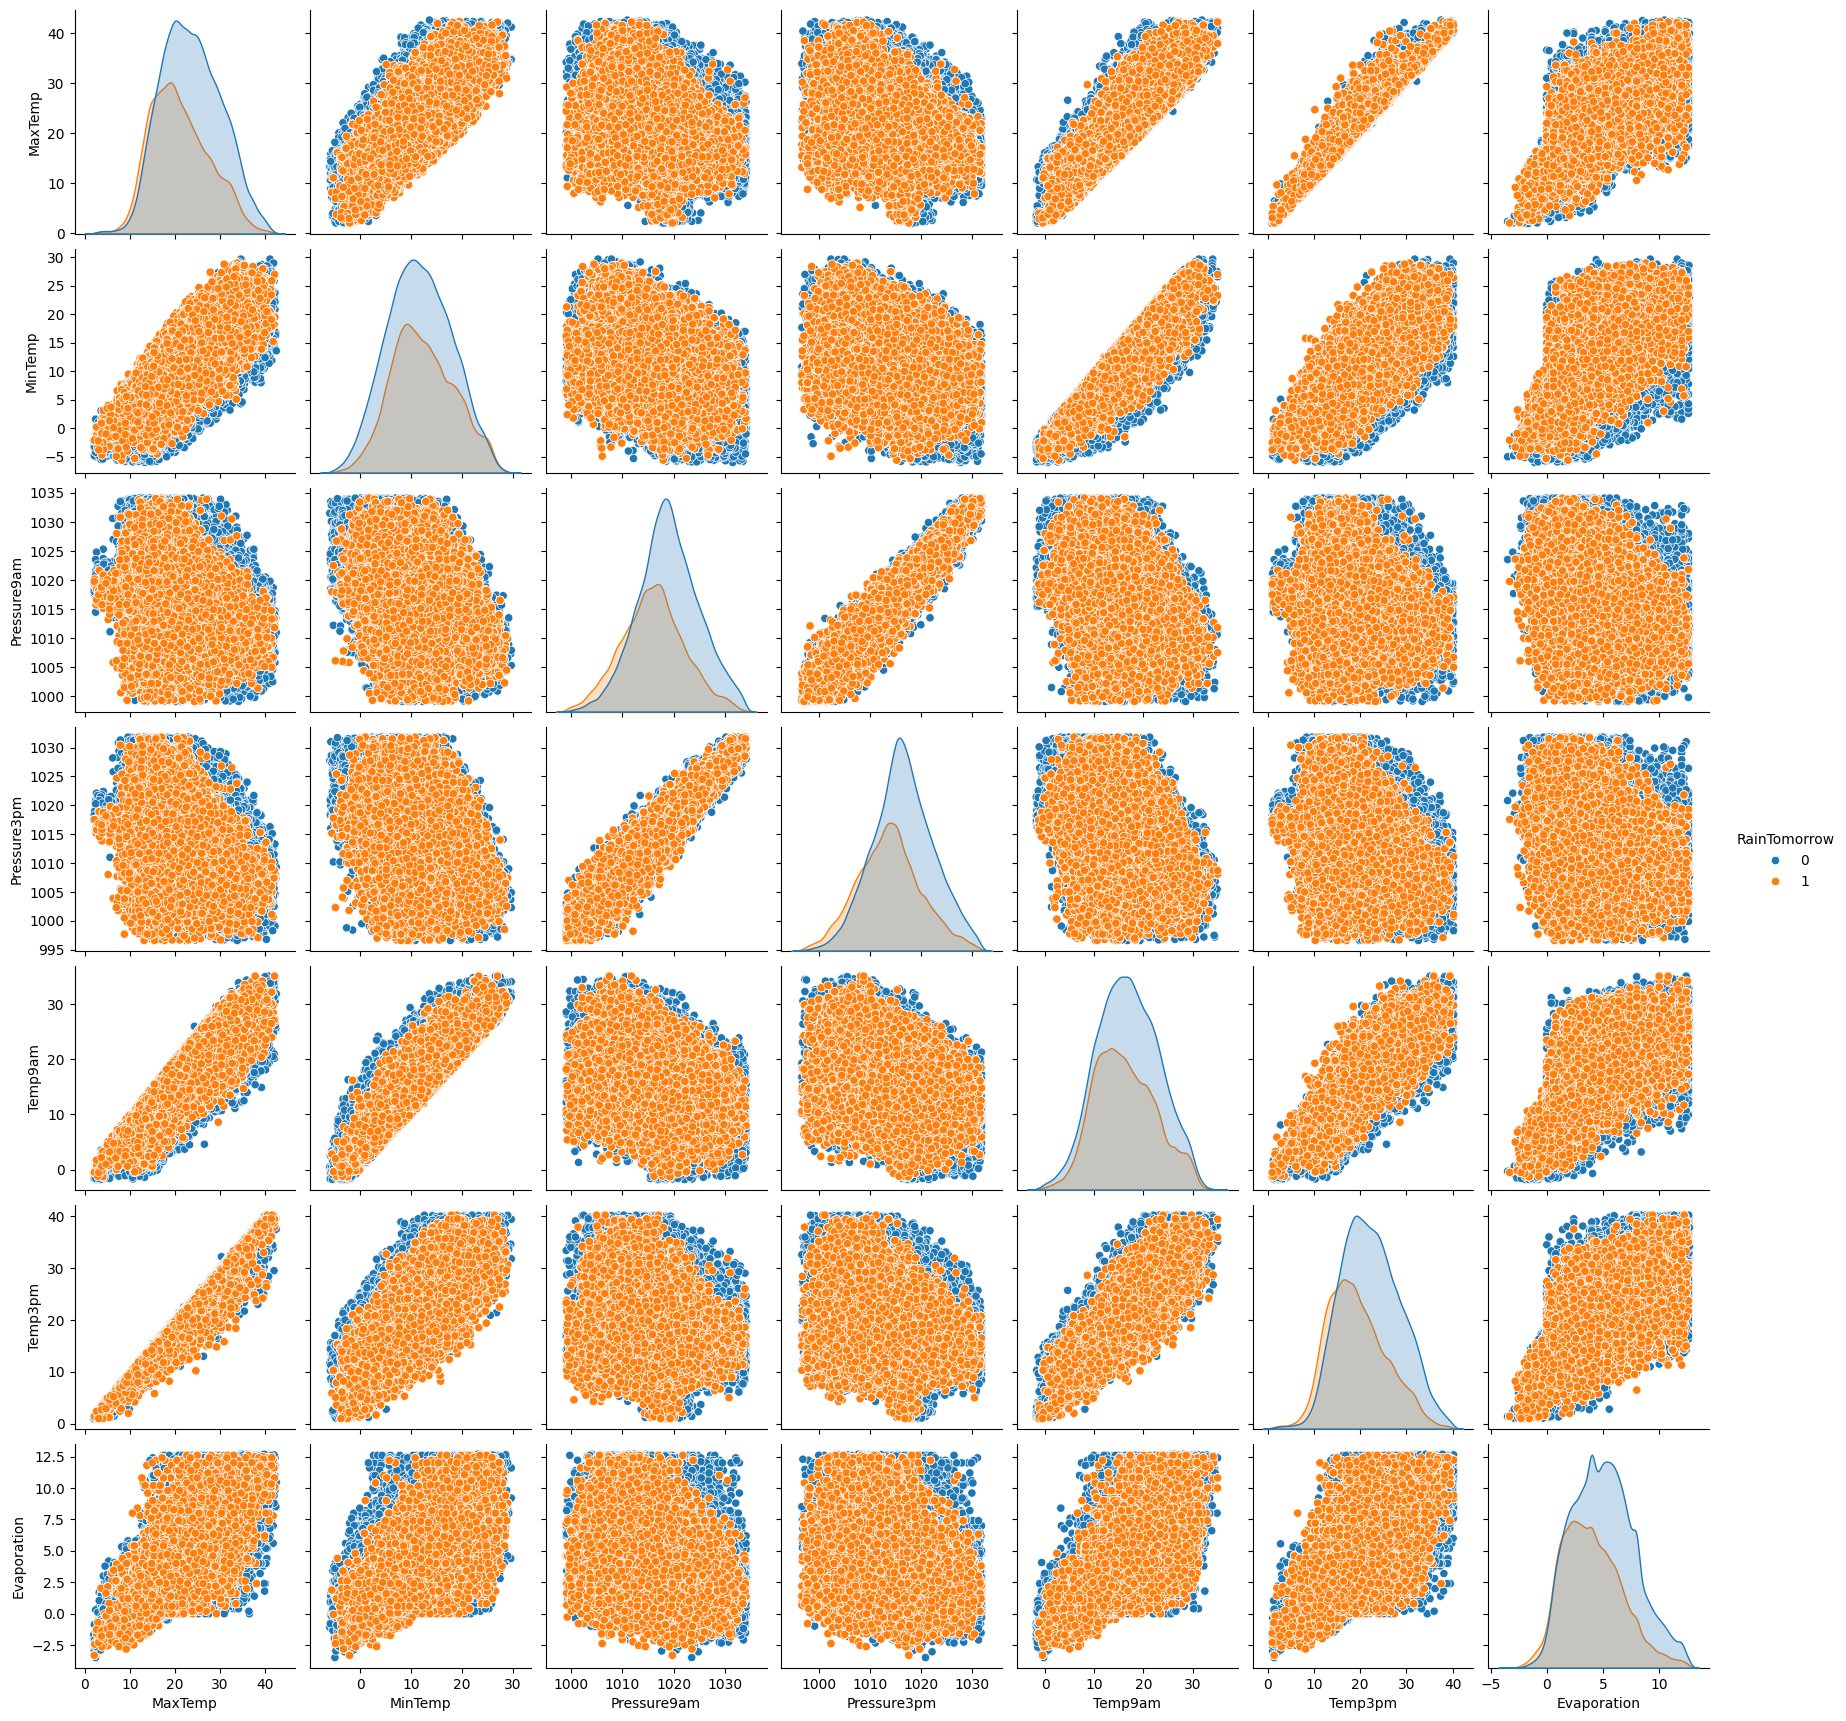

In [ ]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )

In [ ]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [ ]:
modified_data

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
0       0.115284  0.041667  0.543417  0.514778  0.432327     0.569942   
1       0.115575  0.041667  0.375350  0.568966  0.369252     0.564016   
2       0.115866  0.041667  0.529412  0.583744  0.369252     0.695290   
3       0.116157  0.041667  0.425770  0.640394  0.369252     0.584897   
4       0.116448  0.041667  0.658263  0.746305  0.474377     0.639029   
...          ...       ...       ...       ...       ...          ...   
131715  0.656186  0.354167  0.549020  0.598522  0.369252     0.472153   
125885  0.763319  0.895833  0.507003  0.507389  0.369252     0.436735   
130416  0.276565  0.354167  0.198880  0.241379  0.411302     0.110544   
84962   0.146434  0.166667  0.862745  0.726601  0.369252     0.549205   
26599   0.139738  0.708333  0.714286  0.729064  0.390277     0.858316   

        Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity3pm  \
0       0.502581     0.866667       0.521127    0.866667  ...     0.220253   
1       0.741068     0.933333       0.521127    0.400000  ...     0.250243   
2       0.788183     1.000000       0.549296    0.866667  ...     0.300227   
3       0.756945     0.266667       0.239437    0.600000  ...     0.160272   
4       0.409215     0.866667       0.478873    0.066667  ...     0.330217   
...          ...          ...            ...         ...  ...          ...   
131715  0.410327     0.466667       0.323944    0.200000  ...     0.630120   
125885  0.434910     0.600000       0.295775    0.666667  ...     0.610126   
130416  0.117016     0.933333       0.084507    0.200000  ...     0.980006   
84962   0.272363     0.600000       0.577465    0.666667  ...     0.600130   
26599   0.448235     0.400000       0.661972    0.333333  ...     0.560143   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0          0.245714     0.298295  0.866337  0.420182  0.506775  0.530612   
1          0.328571     0.318182  0.338787  0.227798  0.514905  0.594388   
2          0.242857     0.343750  0.345994  0.172605  0.617886  0.566327   
3          0.528571     0.460227  0.296799  0.184085  0.539295  0.650510   
4          0.334286     0.267045  0.782136  0.690418  0.531165  0.732143   
...             ...          ...       ...       ...       ...       ...   
131715     0.497143     0.468750  0.681012  0.472644  0.498645  0.617347   
125885     0.614286     0.656250  0.632788  0.465266  0.544715  0.505102   
130416     0.600000     0.474432  0.734885  0.657690  0.157182  0.216837   
84962      0.271429     0.272727  0.613733  0.517814  0.826558  0.747449   
26599      0.508571     0.426136  0.630876  0.432308  0.658537  0.767857   

        RainToday   RISK_MM  RainTomorrow  
0        0.247121  0.000000           0.0  
1        0.247121  0.000000           0.0  
2        0.247121  0.000000           0.0  
3        0.247121  0.076923           0.0  
4        0.247121  0.015385           0.0  
...           ...       ...           ...  
131715   0.247121  0.153846           1.0  
125885   0.247121  0.153846           1.0  
130416   0.247121  0.676923           1.0  
84962    0.247121  0.753846           1.0  
26599    0.247121  0.630769           1.0  

[156852 rows x 24 columns]

In [ ]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Cloud3pm', 'RISK_MM']
[0.00205993 0.00215407 0.00259089 0.00367568 0.0102656  0.00252838
 0.05894157 0.00143001 0.00797518 0.00177178 0.00167654 0.0014278
 0.00187743 0.00760691 0.03091966 0.00830365 0.01193018 0.02113544
 0.04962418 0.00270103 0.00513723 0.00352198 0.76074491]


In [ ]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
import time
from sklearn.metrics import (
    accuracy_score, roc_auc_score, cohen_kappa_score, ConfusionMatrixDisplay,
    roc_curve, classification_report
)

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()

    # Fit the model
    if verbose == False:
        if hasattr(model, 'fit'):
            model.fit(X_train, y_train)
    else:
        model.fit(X_train, y_train)

    # Predict the test set
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # ROC AUC (requires probabilities)
    probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(y_test, probs)

    # Cohen's Kappa
    coh_kap = cohen_kappa_score(y_test, y_pred)

    # Time taken
    time_taken = time.time() - t0

    # Print metrics
    print("Accuracy = {:.5f}".format(accuracy))
    print("ROC Area under Curve = {:.5f}".format(roc_auc))
    print("Cohen's Kappa = {:.5f}".format(coh_kap))
    print("Time taken = {:.5f} seconds".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))

    # Plot ROC curve
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
    plt.show()

    return model, accuracy, roc_auc, coh_kap, time_taken


Accuracy = 0.78964
ROC Area under Curve = 0.86466
Cohen's Kappa = 0.54945
Time taken = 10.60682 seconds
              precision    recall  f1-score   support

           0    0.80822   0.85949   0.83307     23948
           1    0.75520   0.68005   0.71566     15265

    accuracy                        0.78964     39213
   macro avg    0.78171   0.76977   0.77436     39213
weighted avg    0.78758   0.78964   0.78736     39213



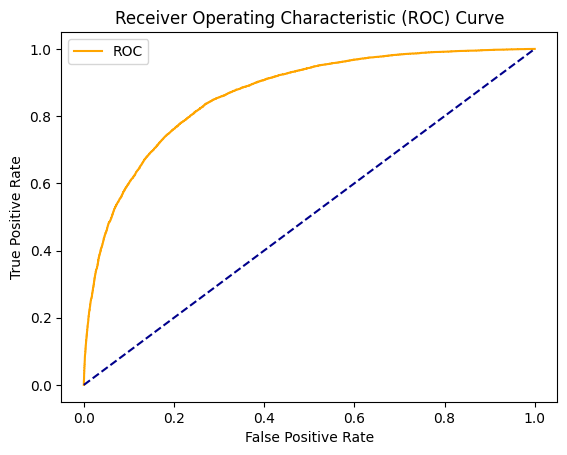

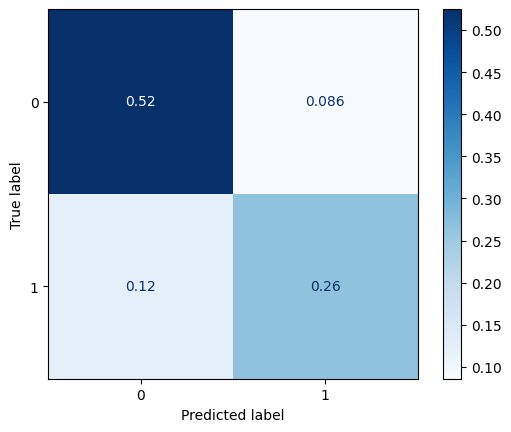

Accuracy = 0.86334
ROC Area under Curve = 0.89360
Cohen's Kappa = 0.71410
Time taken = 1.04344 seconds
              precision    recall  f1-score   support

           0    0.89553   0.87874   0.88705     23948
           1    0.81520   0.83917   0.82701     15265

    accuracy                        0.86334     39213
   macro avg    0.85536   0.85896   0.85703     39213
weighted avg    0.86426   0.86334   0.86368     39213



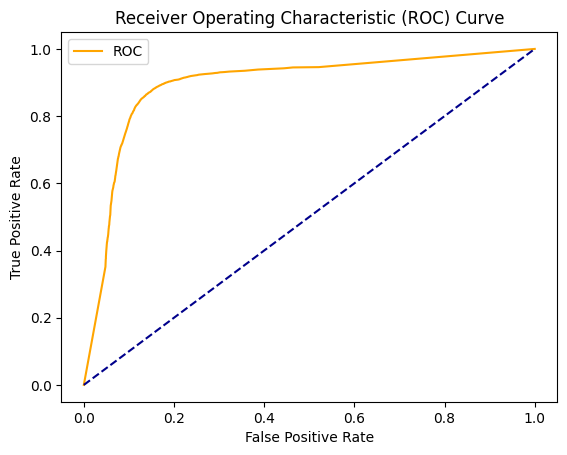

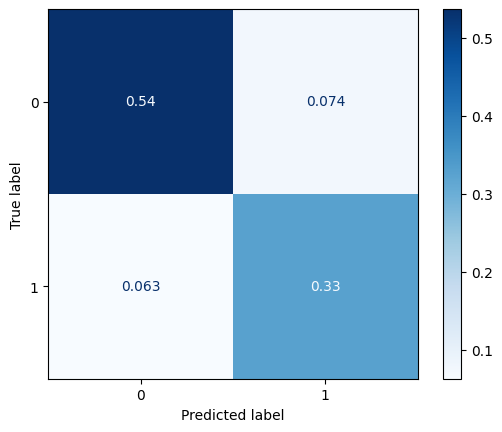

Accuracy = 0.88443
ROC Area under Curve = 0.95740
Cohen's Kappa = 0.75673
Time taken = 420.69316 seconds
              precision    recall  f1-score   support

           0    0.90420   0.90684   0.90552     23948
           1    0.85318   0.84926   0.85121     15265

    accuracy                        0.88443     39213
   macro avg    0.87869   0.87805   0.87837     39213
weighted avg    0.88434   0.88443   0.88438     39213



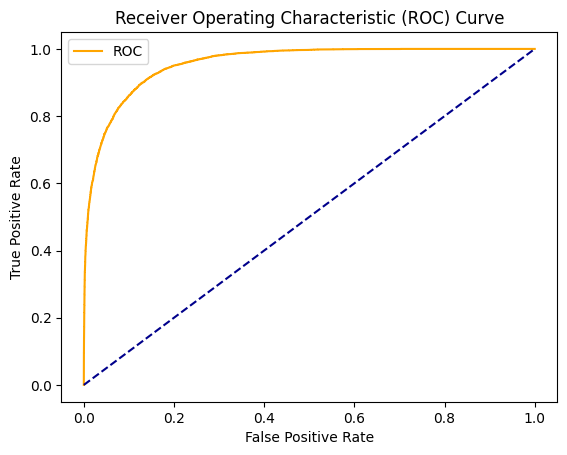

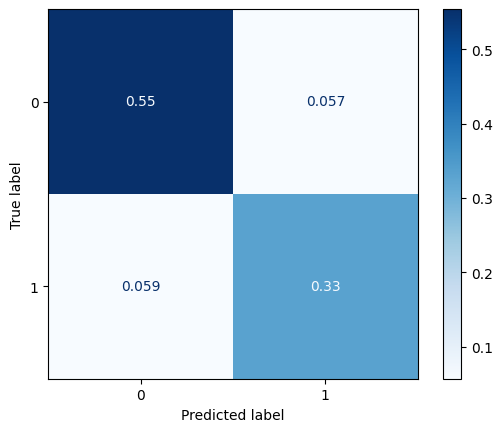

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

# Neural Network
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.88588
ROC Area under Curve = 0.95368
Cohen's Kappa = 0.75995
Time taken = 238.02715 seconds
              precision    recall  f1-score   support

           0    0.90635   0.90684   0.90659     23948
           1    0.85372   0.85300   0.85336     15265

    accuracy                        0.88588     39213
   macro avg    0.88004   0.87992   0.87998     39213
weighted avg    0.88586   0.88588   0.88587     39213



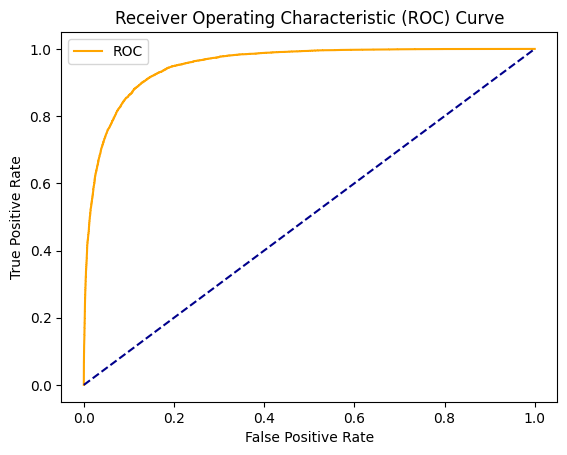

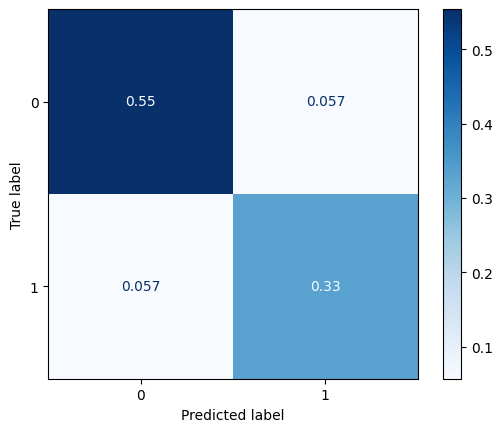

(MLPClassifier(),
 0.8858796827582689,
 0.9536762641799892,
 0.7599542004594868,
 238.0271487236023)

In [ ]:
run_model(MLPClassifier(), X_train, y_train, X_test, y_test)